# Gaussian Processes metamodeling, practical session

**Exercice 1: Simulation of the trajectories of a Gaussian process whose mean and covariance functions are prescribed**



1.a) Let $(Z_t)_{t \in \mathbb{R}}$ be a stationary centered Gaussian process with covariance $C(t,t')=\sigma^2 R(t-t')$. Consider a grid of $[0,1]$ composed with $N=200$ points

- Gaussian covariance: simulate some realizations of $(Z_t)_{t \in \mathbb{R}}$ on the grid with $\sigma^2=0.5$ and $R(h)=e^{-\left(\frac{h}{\theta}\right)^2}$. Take $\theta=0.05$, then $\theta = 0.2$.


- Exponential covriance: simulate some realizations of $(Z_t)_{t \in \mathbb{R}}$ on the grid with $\sigma^2=0.5$ and $R(h)=e^{-\frac{|h|}{\theta}}$. Take $\theta=0.05$, then $\theta=0.2$.


- Gaussian covariance with a nugget effect: simulate some realizations of $(Z_t)_{t \in \mathbb{R}}$ on the grid with $\sigma^2=0.5$ and $R(h)=e^{-\left(\frac{h}{\theta}\right)^2}+\lambda \delta_0(h)$. Take $\lambda=0.2$ and $\theta=0.05$, then $\theta = 0.2$.

Notation: $\delta_O(h)=0$ for $h \neq 0$, $\delta_0(0)=1$.

In [1]:
library(DiceKriging)

N <- 200 #nb of points in the trajectory
x <- seq(0,1,length.out=N)
dist_all <- as.matrix(dist(x))
n <- 10 # simulation of n trajectories
Z1 <- matrix(rnorm(N*n),N,n)  # simulation of a gaussian centred vector 
# with covariance matrix identity
f0 = rep(0,N)


In [2]:
# gaussian covariance 
sig2 <- 0.5
#theta <- 0.05
theta <- 0.2
lambda <- 10^(-10)
#lambda <-0
cov = sig2*(exp(-(dist_all/theta)^2) + lambda * diag(1,N))  # cov between x
Z2 <- matrix(0,N,n)
for (i in 1:n){
	Z2[,i] <- f0+t(chol(cov))%*%Z1[,i]
}

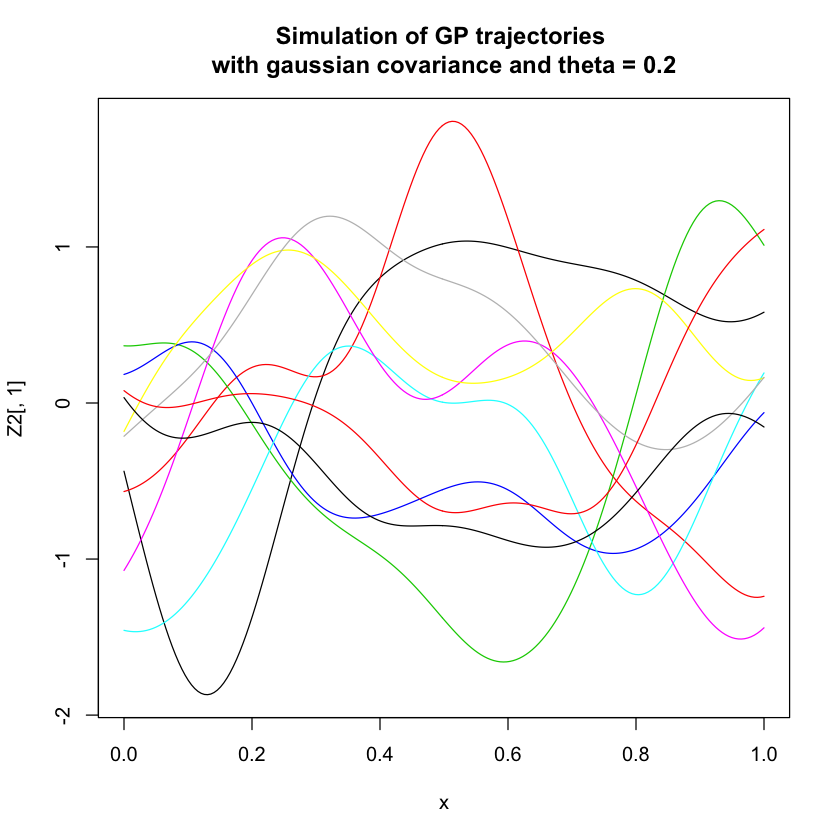

In [7]:
plot(x,Z2[,1], main=paste('Simulation of GP trajectories 
with gaussian covariance and theta =',theta),type='l',ylim=c(min(Z2),max(Z2)))
for (i in 2:n)
	lines(x,Z2[,i],col=i)

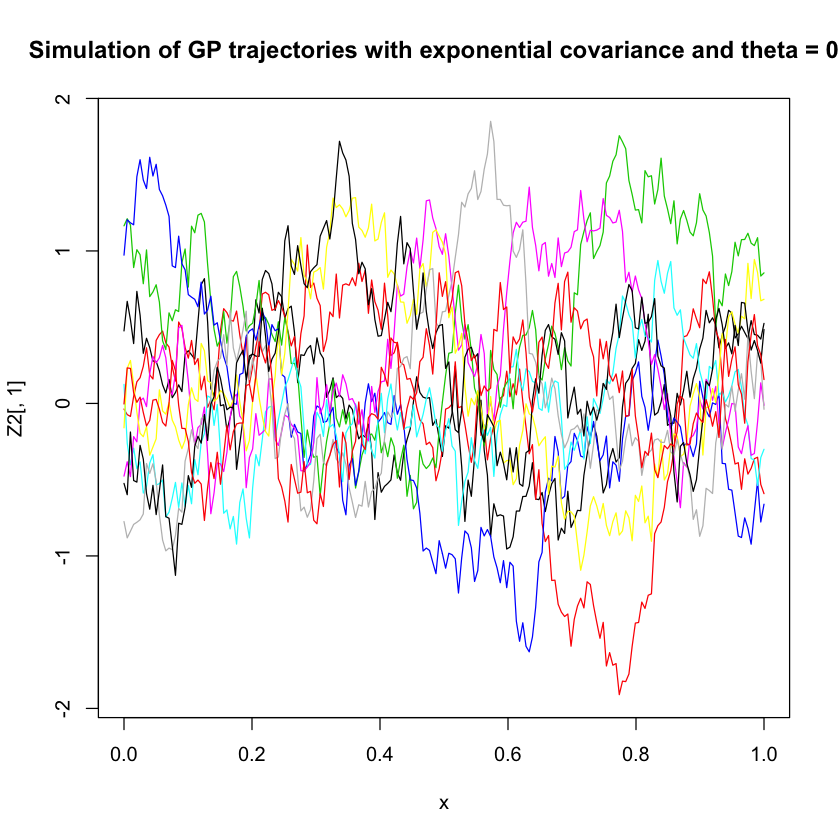

In [3]:
# exponential covariance
sig2 <- 0.5
#theta <- 0.05
theta=0.2
cov <- sig2*exp(-(dist_all/theta))
Z2 <- Z1
for (i in 1:n)
  Z2[,i] <- f0+t(chol(cov))%*%Z1[,i]
plot(x,Z2[,1], main=paste('Simulation of GP trajectories with exponential covariance and theta =',theta),type='l',ylim=c(min(Z2),max(Z2)))
for (i in 2:n)
	lines(x,Z2[,i],col=i)

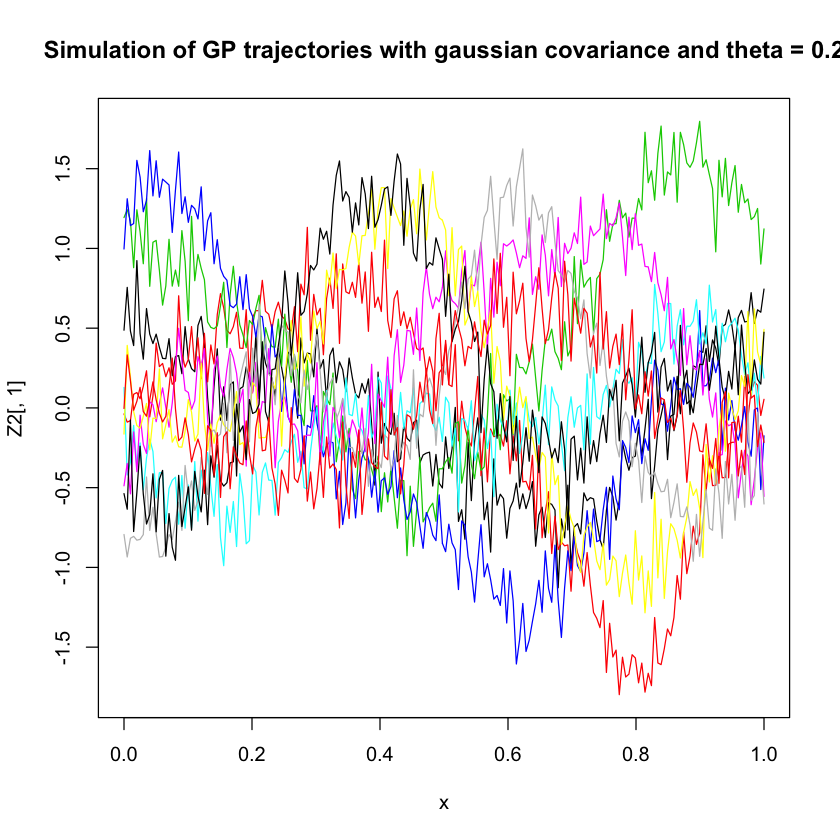

In [4]:
# gaussian covariance with nugget effect
sig2 <- 0.5
theta <- 0.2
lambda <- 0.05
cov <- sig2*(exp(-(dist_all/theta)^2) + lambda * diag(1,N))
Z2 <- Z1
for (i in 1:n)
  Z2[,i] <- f0+t(chol(cov))%*%Z1[,i]
plot(x,Z2[,1], main=paste('Simulation of GP trajectories with gaussian covariance and theta =',theta),type='l',ylim=c(min(Z2),max(Z2)))
for (i in 2:n)
  lines(x,Z2[,i],col=i)

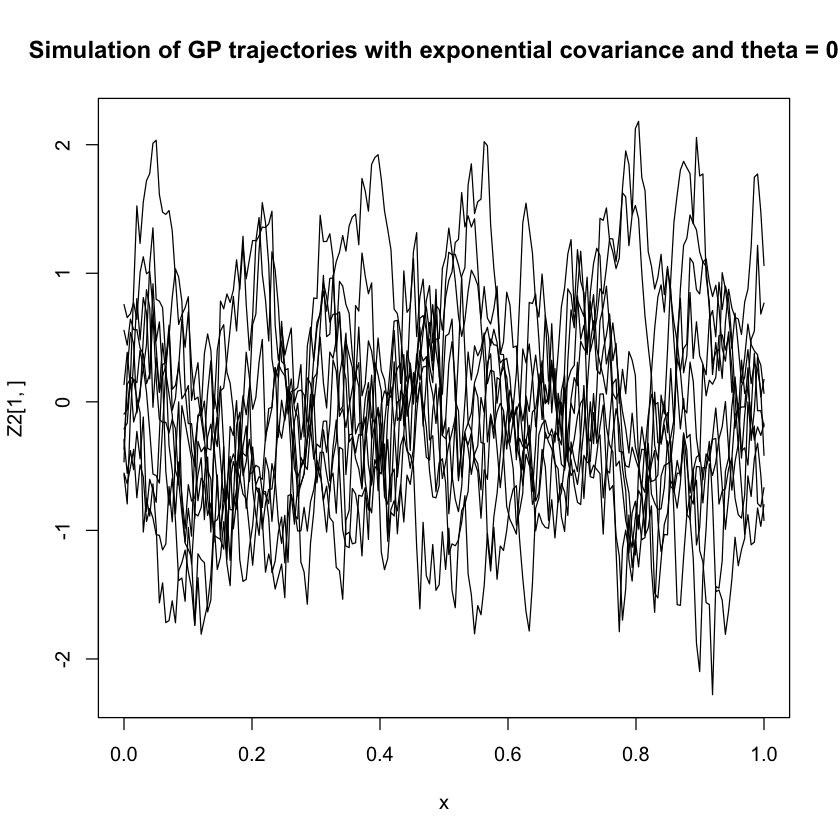

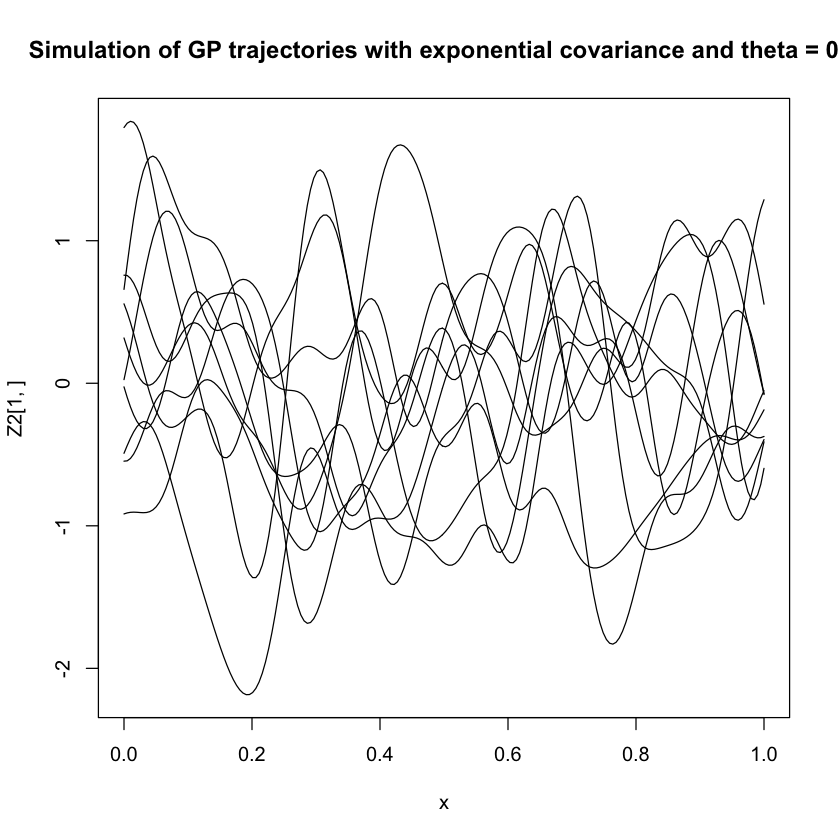

In [5]:
##### or with DiceKriging
type <- "exp"
coef <- c(theta = 0.05)
sigma <- 0.5
model <- km(design=x, response=rep(0,N),coef.trend = 0,covtype=type, coef.cov=coef, coef.var=sigma)
Z2 <- simulate(model, nsim=10, newdata=NULL)
plot(x,Z2[1,], main=paste('Simulation of GP trajectories with exponential covariance and theta =',theta),type='l',ylim=c(min(Z2),max(Z2)))
for (i in 2:n)
  lines(x,Z2[i,], main=paste('Simulation of GP trajectories with exponential covariance and theta =',theta))


type <- "gauss"
lambda <- 10^(-10) # diagonal term to outperform the conditioning of the covariance matrix 
model <- km(design=x, response=rep(0,N),coef.trend = 0,covtype=type, coef.cov=coef, coef.var=sigma,nugget=lambda)
Z2 <- simulate(model, nsim=10, newdata=NULL)
plot(x,Z2[1,], main=paste('Simulation of GP trajectories with exponential covariance and theta =',theta),type='l',ylim=c(min(Z2),max(Z2)))
for (i in 2:n)
  lines(x,Z2[i,], main=paste('Simulation of GP trajectories with exponential covariance and theta =',theta))


1.b) Let $\left(Z(x)\right)_{x \in \mathbb{R}^2}$ be a centered stationary Gaussian process with $C(x,x')=\sigma^2 R(x-x')$. Consider a grid of $[0,1] \times [0,1]$ composed with $N=50 \times 50$ points.

- Isotropic Gaussian covariance: simulate some realizations of $\left(Z(x)\right)_{x \in \mathbb{R}^2}$ on the grid with $\sigma^2=0.5$ and $R(h)=e^{-\|\frac{h}{\theta}\|^2}$. Take $\theta=0.1$.

- Anisotropic Gaussian covariance: simulate some realizations of $\left(Z(x)\right)_{x \in \mathbb{R}^2}$ on the grid with $\sigma^2 =0.5$ and $R(h)=e^{-\sum_{i=1}^2 \left(\frac{h_i}{\theta_i}\right)^2}$. Take $\theta_1=0.1$ and $\theta_2= 0.03$.

- Exponential anisotropic covariance: simulate some realizations of $\left(Z(x)\right)_{x \in \mathbb{R}^2}$ on the grid with $\sigma^2 =0.5$ and $R(h)=e^{- \sum_{i=1}^2 \frac{|h_i|}{\theta_i}}$. Take $\theta_1= 0.1$ and $\theta_2=0.03$.


In [5]:
d = 2 # inputs space dimension
N_dim = 50 # nb of points in each dimension of the inputs space
N_tot = N_dim^d 
x <- as.matrix(expand.grid(seq(0,1,length.out=N_dim),seq(0,1,length.out=N_dim)))

In [6]:
mu <- 0
sig2 <- 0.5
dist1 <- as.matrix(dist( x[,1] ))
dist2 <- as.matrix(dist( x[,2] ))
# isotropic Gaussian covariance
theta = 0.1
lambda <- 10^(-10)  # diagonal term to outperform the conditioning of the covariance matrix
cov = sig2*(exp(-((dist1/theta)^2 +(dist2/theta)^2))+ lambda * diag(1,N_tot))
f0 = x %*% c(0,0)

In [7]:
n <- 1 # simulation of n trajectories
Z1 <- matrix(rnorm(N_tot*n),N_tot,n) # simulation of a centred gaussian vector with covariance matrix identity 
Z2=f0+t(chol(cov))%*%Z1  # then linear transformation

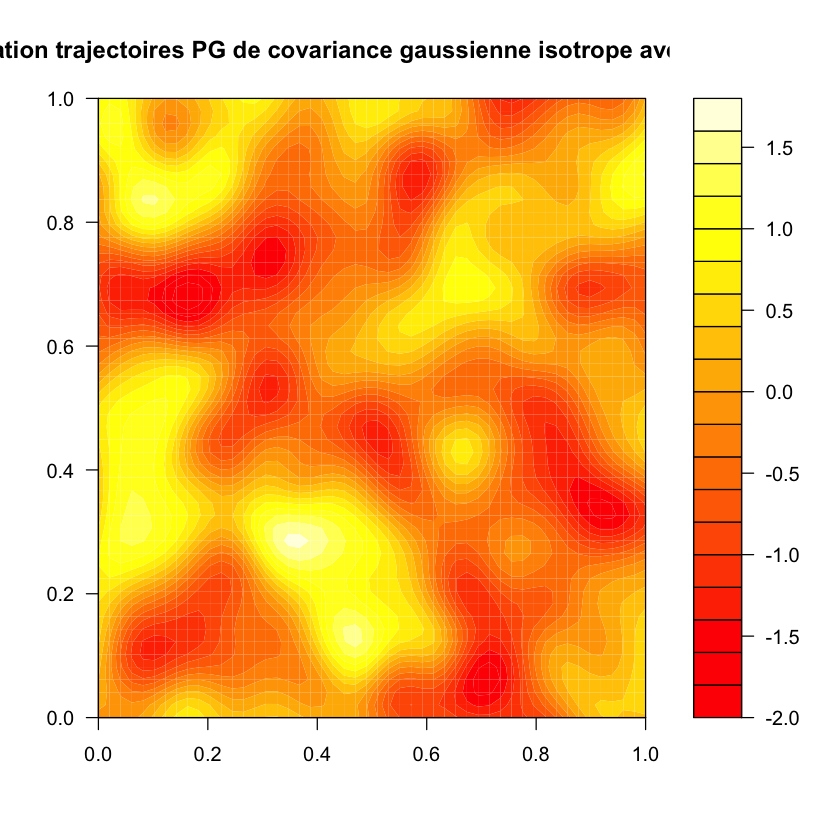

In [10]:
par(mfrow=c(1,1))
filled.contour(matrix(Z2,N_dim,N_dim),main=paste('Simulation trajectoires PG de covariance gaussienne isotrope avec theta =', theta),color.palette=heat.colors)

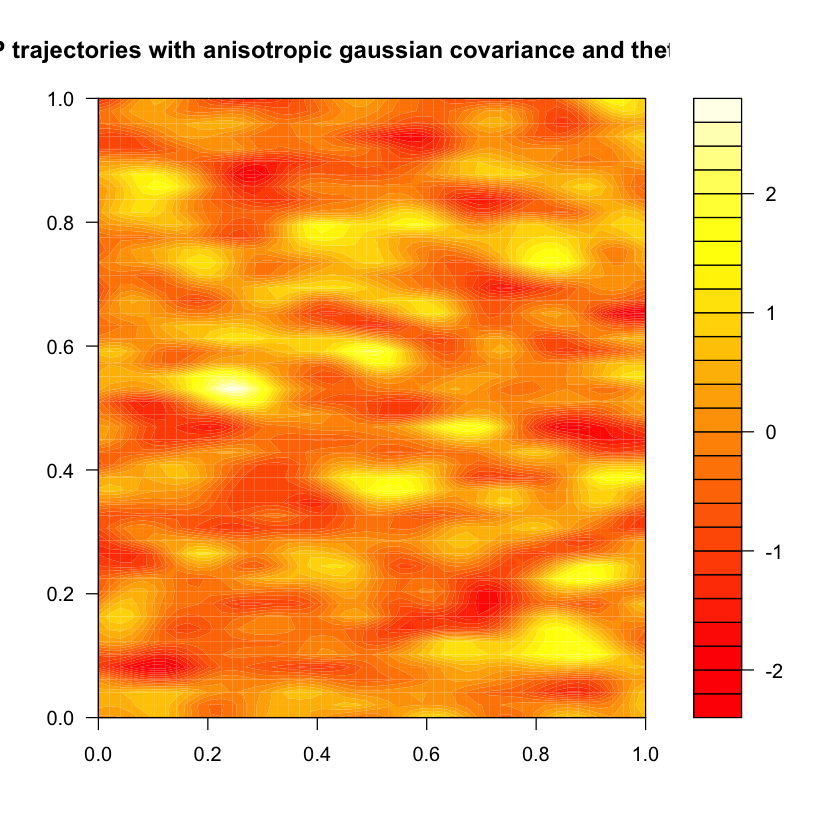

In [8]:
# anisotropic gaussian covariance
theta1 = 0.1
theta2 = 0.03
cov = sig2*(exp(-((dist1/theta1)^2 +(dist2/theta2)^2)) + lambda * diag(1,N_tot))
f0 = x %*% c(0,0)

Z2=f0+t(chol(cov))%*%Z1  # then linear transformation 
filled.contour(matrix(Z2,N_dim,N_dim),main=paste('Simulation of GP trajectories with anisotropic gaussian covariance and theta1 =', theta1,'& theta2=',theta2),color.palette=heat.colors)

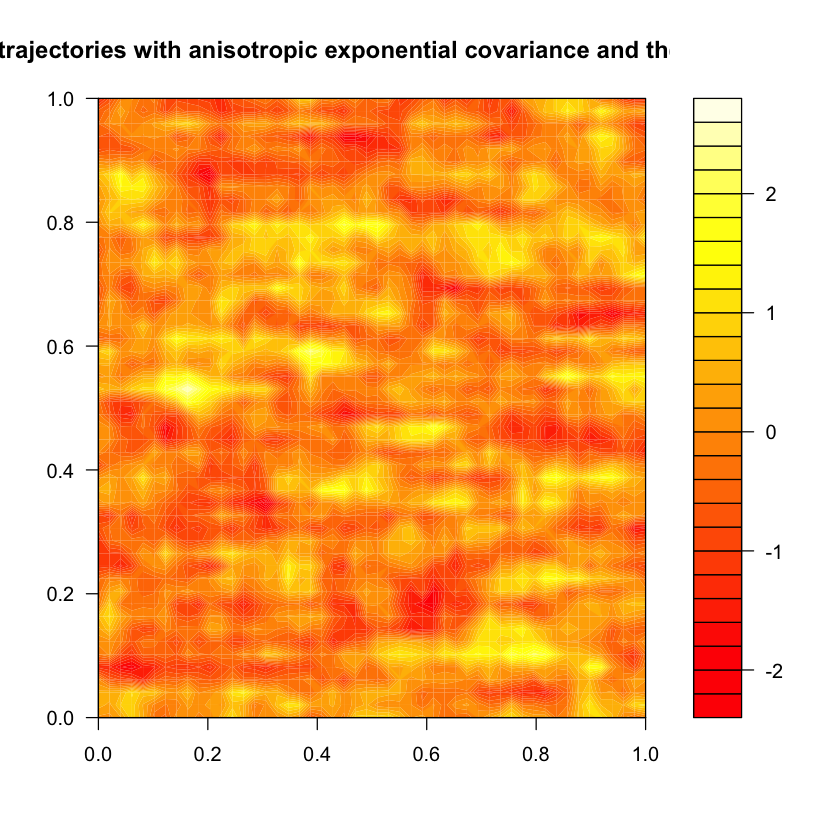

In [9]:
# anisotropic exponential covariance 
cov = sig2*exp(-(dist1/theta1 + dist2/theta2)) 
f0 = x %*% c(0,0)

Z2=f0+t(chol(cov))%*%Z1  # then linear transformation 
filled.contour(matrix(Z2,N_dim,N_dim),main=paste('Simulation of GP trajectories with anisotropic exponential covariance and theta1 =', theta1,'& theta2=',theta2),color.palette=heat.colors)

**Exercise 2: Construction of GP metamodel with a learning sample in dimension 1**
 


We consider the analytical 1D function on $[0,1]$:
$$f(x)=\sin(30(x-0.9)^4)cos(2(x-0.9))+\frac{x-0.9}{2}$$


Apply the following methodology: 

**Step 0: Representation of the function on $[0,1]$**

- Evaluate $f$ on $100$ equidistributed points and plot it.



**Step 1: Construction of a learning sampleand evaluation of $f$ on this learning sample**

- Vary the size of the leraning sample from $N=10$ to $30$ points.

- Vary the nature of the design: equidistributed points on $[0,1]$, random uniform sample on $[0,1]$.


**Step 2: Estimation of the parameters of the GP metamodel**

Let $\left(Z(x)\right)_{x \in \mathbb{R}^2}$ be a Gaussian process with constant mean and Matern $5/2$ stationary covariance. That means 

$$R(h)=\left(1 + \frac{\sqrt{5}h}{\theta} +\frac{5h^2}{3\theta^2}\right)\exp\left(- \frac{\sqrt{5}h}{\theta}\right).$$

Construct the metamodel based on $Z$ conditionally to the learning sample:

- estimate the parameters of the metamodel;

- compute and plot the metamodel on the test sample;

- compute and plot the MSE on the test sample;

- compute $Q^2$ on the test sample.

In [10]:
library(rgl)
library(lhs)
library(DiceKriging)
library(DiceView)

Loading required package: DiceEval


In [11]:
######################## Learning basis and test basis ##########################
N_BA = 15                ## Number of points in the learning sample (BA)
d = 1                     ## Dimension of the inputs space
S_BA = optimumLHS(N_BA,d) ## Simulation os the learning basis BA by optimized LHS  => use the function optimumLHS
N_BT = 100                 ### Number of points in the test basis
S_BT = seq(0,1,length.out=N_BT)    ### Simulation of an initial test basis
                           ## S_BT : inputs for the test basis
                           ## Y_BT : output of the emulator

In [12]:
fx_exo2 <- function(X)
sin(30*(X-0.9)^4)*cos(2*(X-0.9)) + (X-0.9)/2

In [13]:
Y_BA <- fx_exo2(S_BA)   ## Y_BA : output of the emulator on the learning basis BA
Y_BT <- fx_exo2(S_BT)   ## Y_BT :output of the emulator on the test basis BT

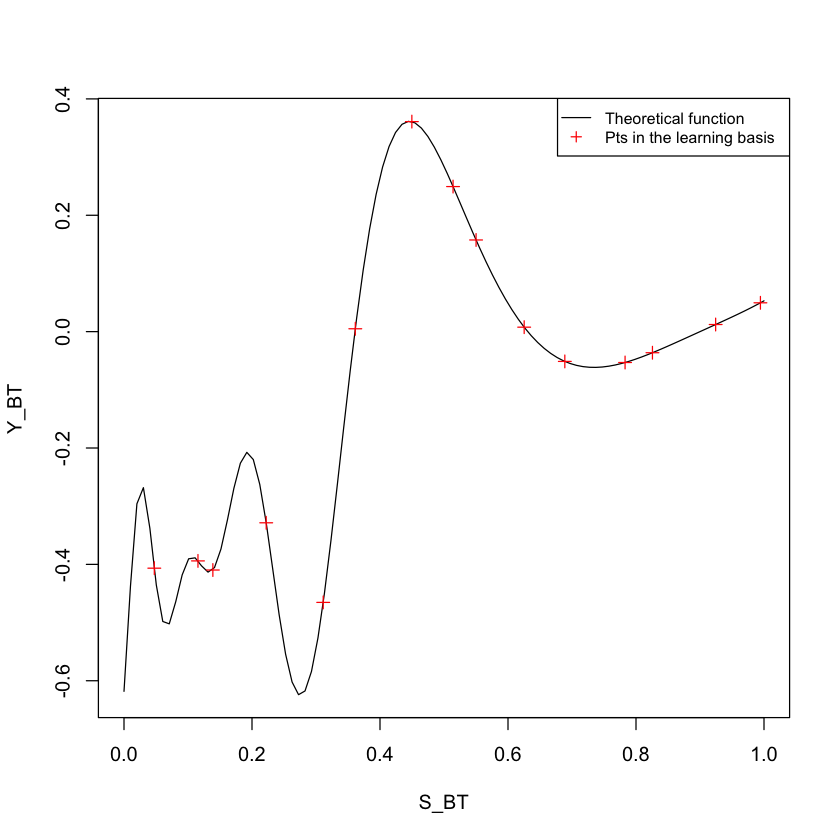

In [9]:
plot(S_BT,Y_BT,type='l')
points(S_BA,Y_BA,pch=3,col=2)
legend("topright",y=c(0.17,0.33),c('Theoretical function','Pts in the learning basis'),lty=c(1,0),
pch=c(-1,3),col=c(1,2),cex=0.8)



optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  1.801171 
  - best initial criterion value(s) :  7.549561 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=      -7.5496  |proj g|=       0.1678
At iterate     1  f =      -9.6361  |proj g|=       0.12065
At iterate     2  f =      -9.8571  |proj g|=       0.10663
At iterate     3  f =      -9.8598  |proj g|=       0.83473
At iterate     4  f =        -9.86  |proj g|=      0.017191
At iterate     5  f =        -9.86  |proj g|=    8.2986e-05
At iterate     6  f =        -9.86  |proj g|=    8.3374e-09

iterations 6
function evaluations 11
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
no

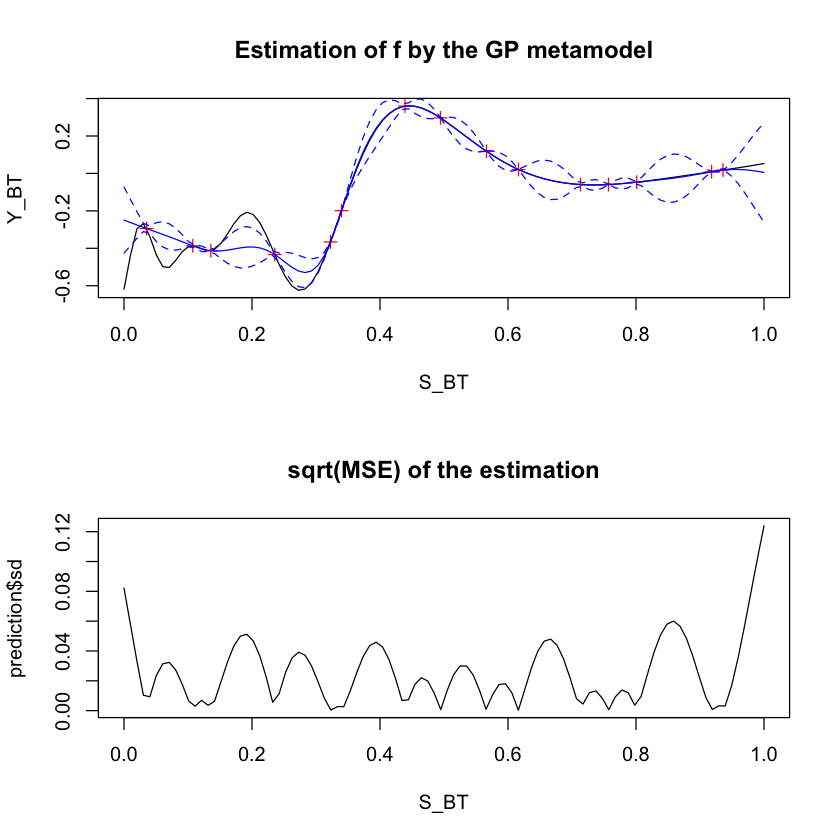

In [14]:
library(DiceKriging)
metamodel <- km(formula=~1,design=S_BA,response=Y_BA,covtype="matern5_2") # Construction of the Gaussian Process emulator 
prediction <- predict.km(metamodel,S_BT,'UK',checkNames=FALSE) # Prediction of the metamodel on the test basis => use of the function predict.km

par(mfrow=c(2,1))
plot(S_BT,Y_BT,type='l',main='Estimation of f by the GP metamodel')
points(S_BA,Y_BA,pch=3,col='red')
lines(S_BT,prediction$mean,col='blue')
lines(S_BT,prediction$lower95,col='blue',lty=2)
lines(S_BT,prediction$upper95,col='blue',lty=2)
plot(S_BT,prediction$sd,type='l',main="sqrt(MSE) of the estimation")


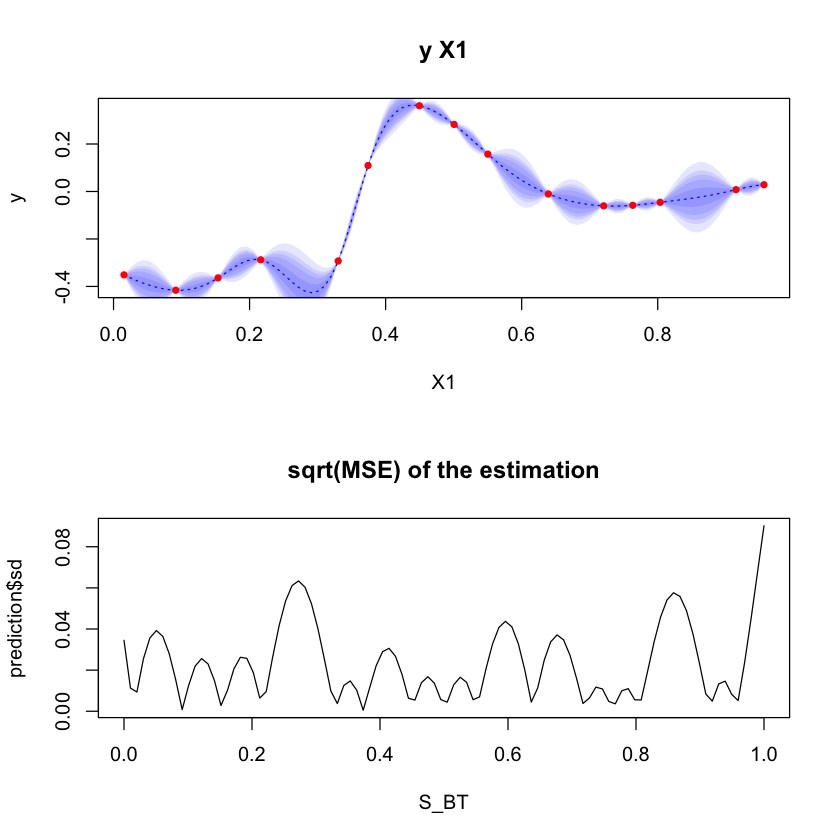

In [15]:
library(DiceView)
# with DiceView
par(mfrow=c(2,1))
sectionview(metamodel)
plot(S_BT,prediction$sd,type='l',main="sqrt(MSE) of the estimation")

In [15]:
#### Computation of Q2 on BT ####
# Building of the function allowing to compute Q2
Q2 <- function(y,yhat)
  1-mean((y-yhat)^2)/var(y)
Q2_BT <- Q2(Y_BT,prediction$mean) # Computation of Q2 on the test basis


In [17]:
#### Display of the results ####
print(paste('Number of points in the learning sample :',N_BA))
print(paste('Inputs space dimension :',d))
print(paste('Q2 on the test basis :',Q2_BT))


[1] "Number of points in the learning sample : 15"
[1] "Inputs space dimension : 1"
[1] "Q2 on the test basis : 0.941007990856308"


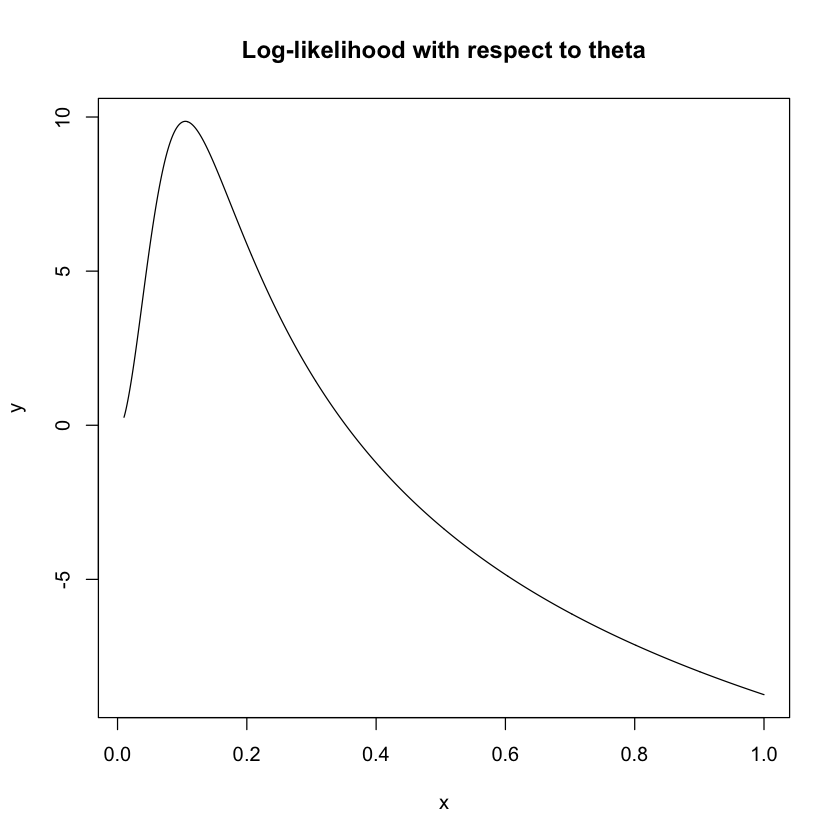

In [16]:
#### Optional part ####
## Computation of the likelihood and optimization of hyperparameters
x <- seq(0.01,1,length=1000)
y <- sapply(x,logLikFun,model=metamodel)
plot(x,y,type='l',main='Log-likelihood with respect to theta')

theta_optim <- x[which.max(y)] # Identification of optimal theta 


In [15]:
theta_optim

[1] 0.09324324

**Step 3: adaptive planification**

- find the point $x$ where the MSE is maximal and add it to the learning sample;

- update the metamodel (estimation of the hyperparameters, construction of the predictor and computation of the MSE);

- Plot the predictor and MSE as in **Step 2**.


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  1.929313 
  - best initial criterion value(s) :  7.561811 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=      -7.5618  |proj g|=        1.872
At iterate     1  f =      -10.975  |proj g|=        0.1115
At iterate     2  f =      -10.996  |proj g|=       0.10817
At iterate     3  f =      -10.997  |proj g|=       0.17495
At iterate     4  f =      -10.997  |proj g|=     0.0028818
At iterate     5  f =      -10.997  |proj g|=    2.9186e-06

iterations 5
function evaluations 9
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 2.91858e-06
final function

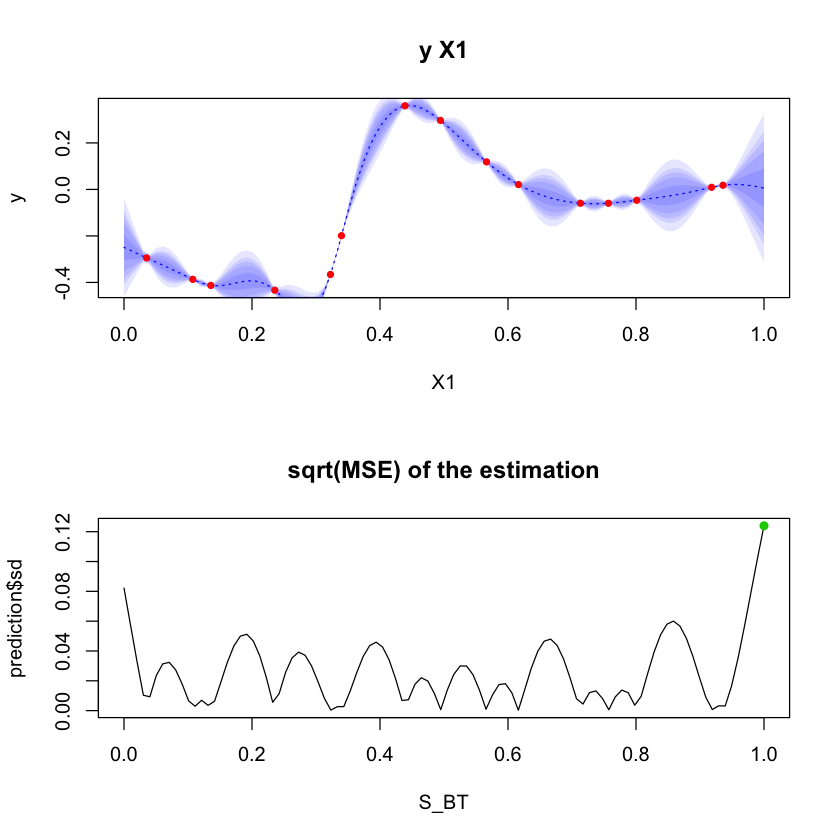

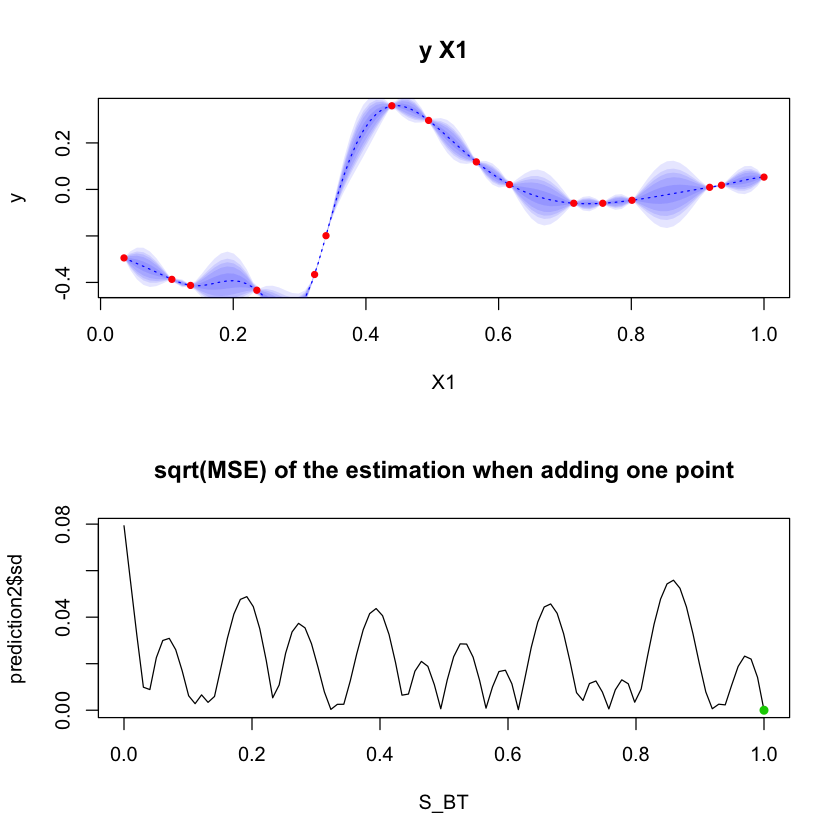

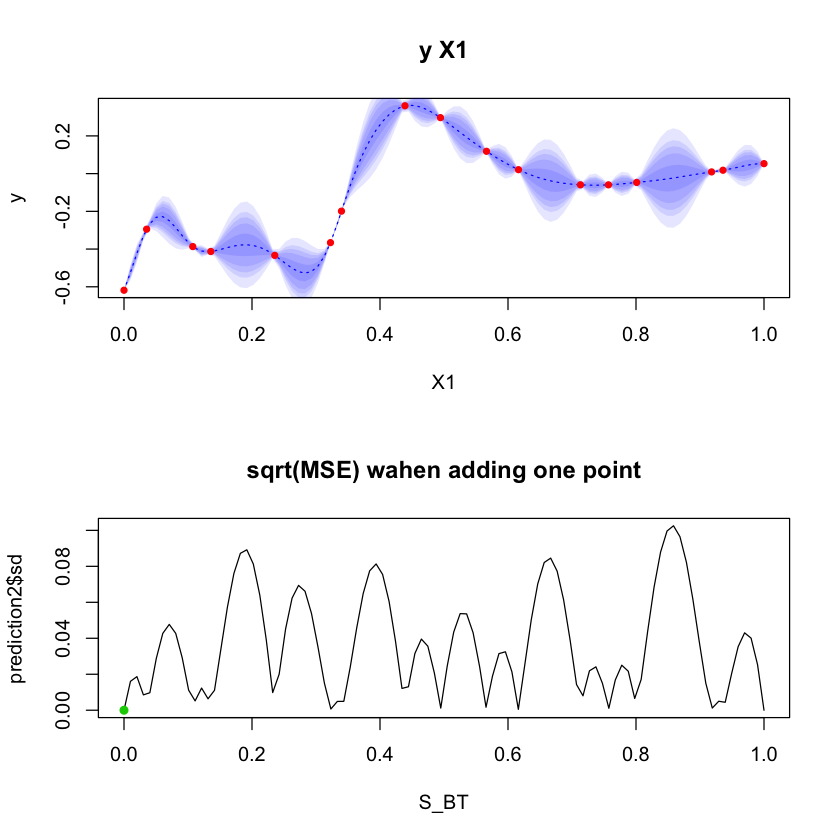

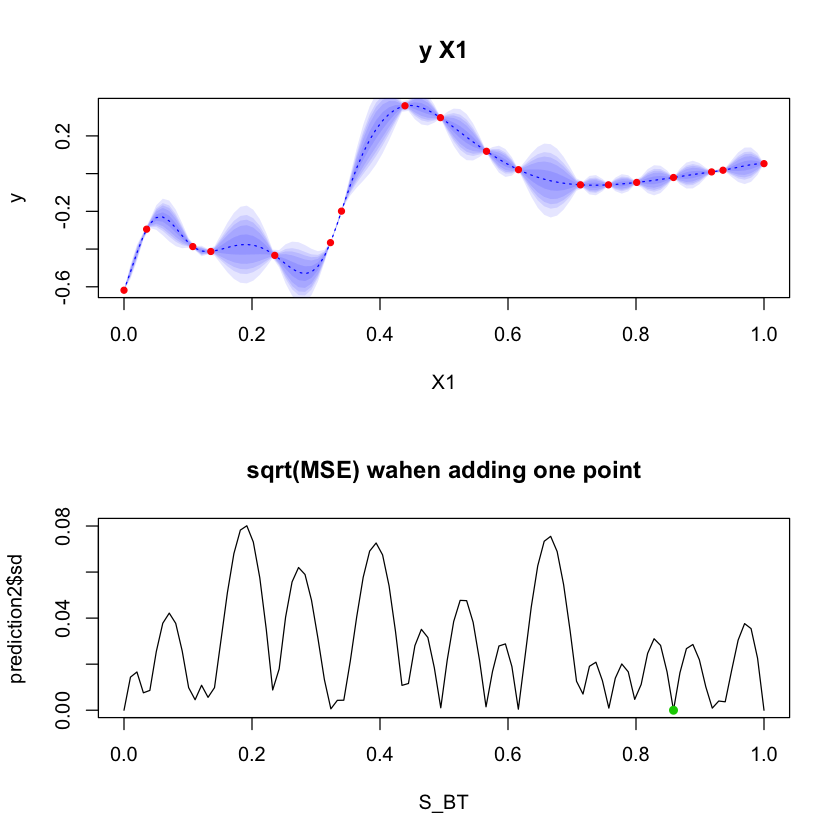

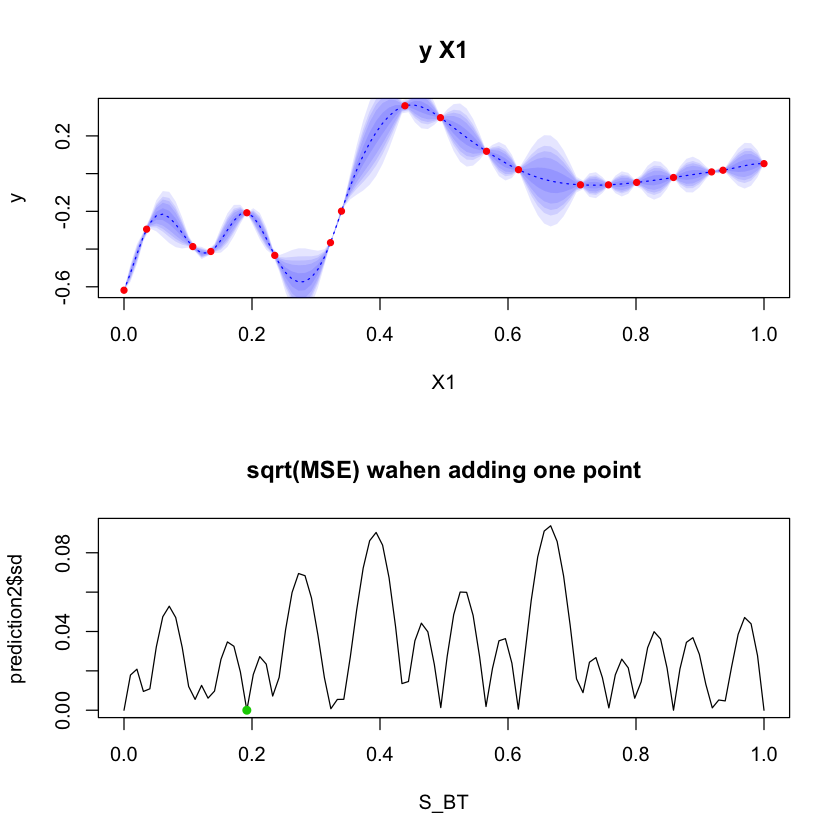

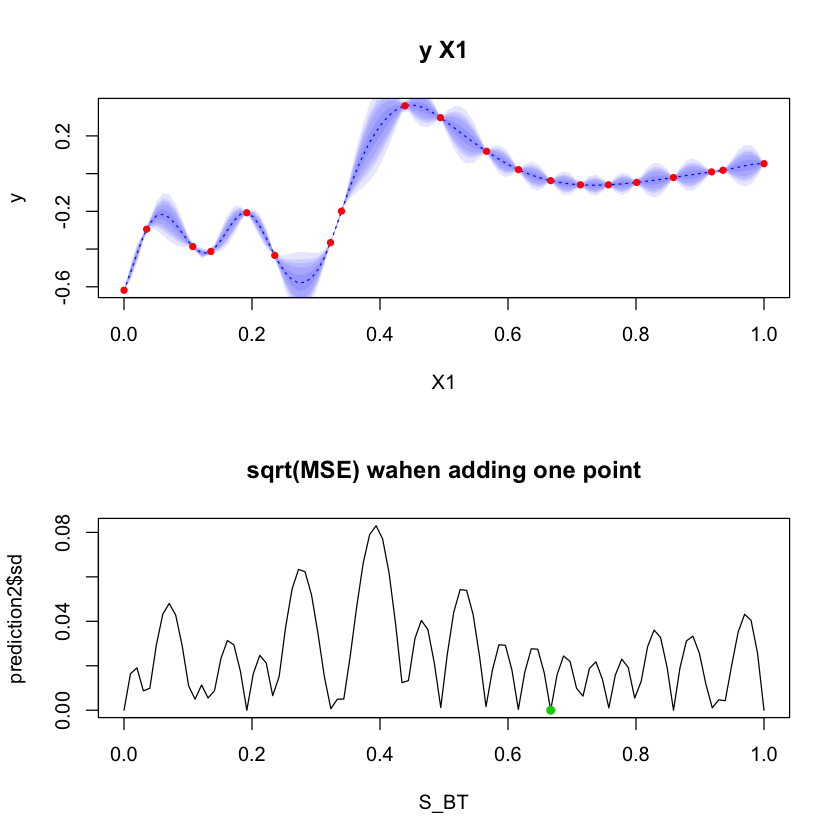

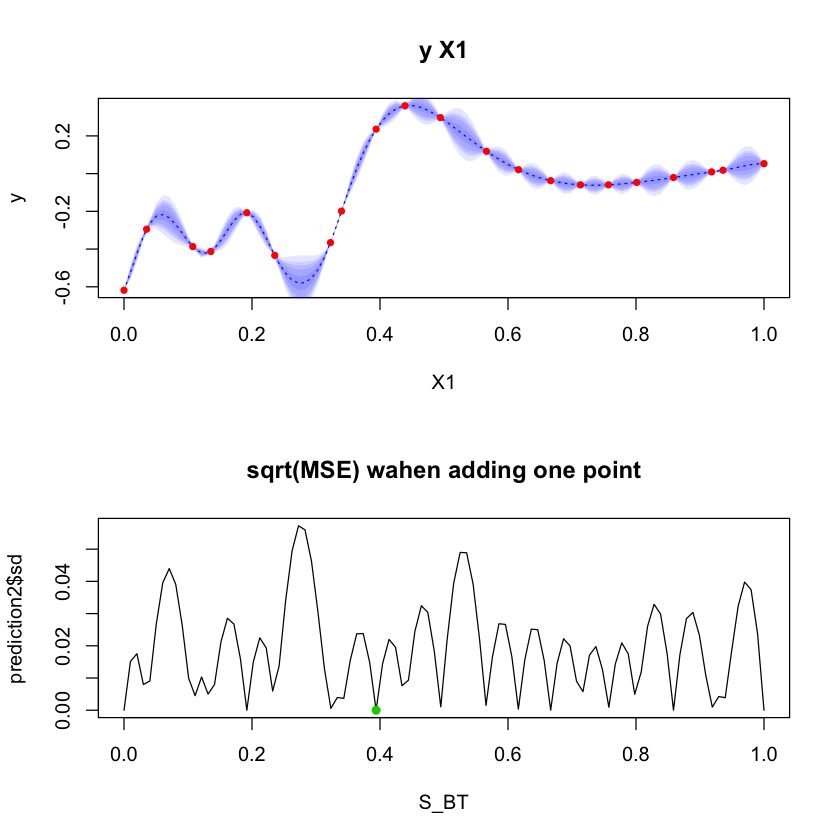

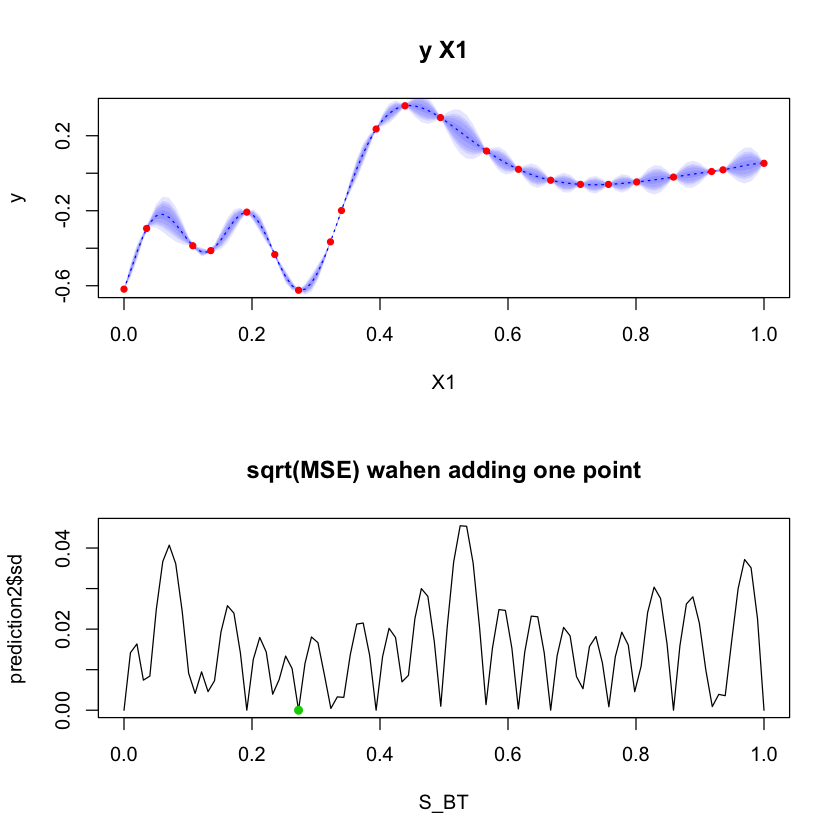

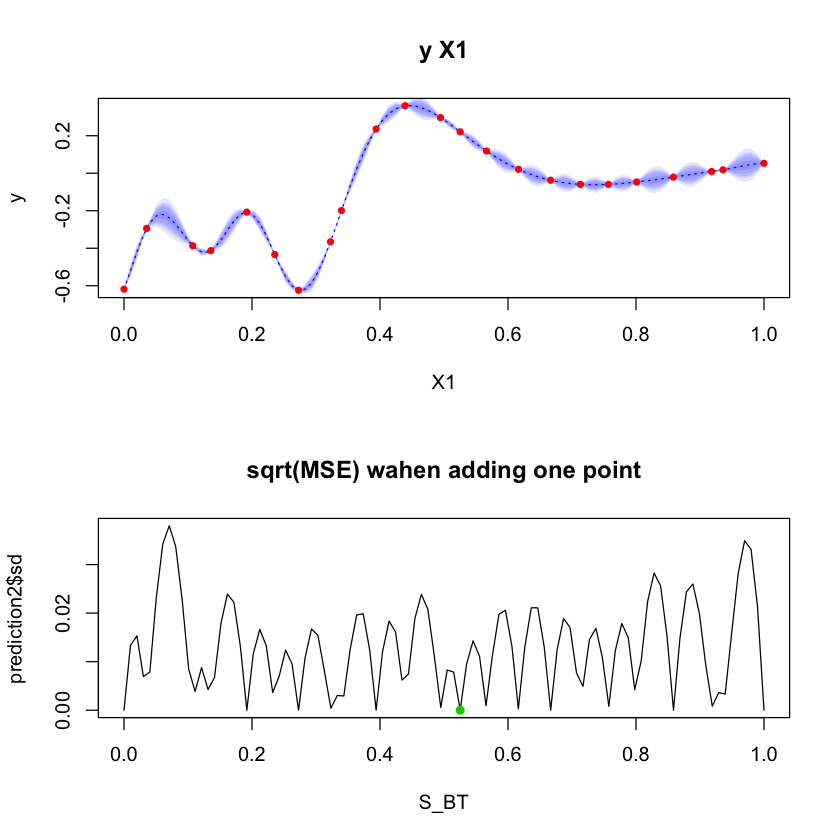

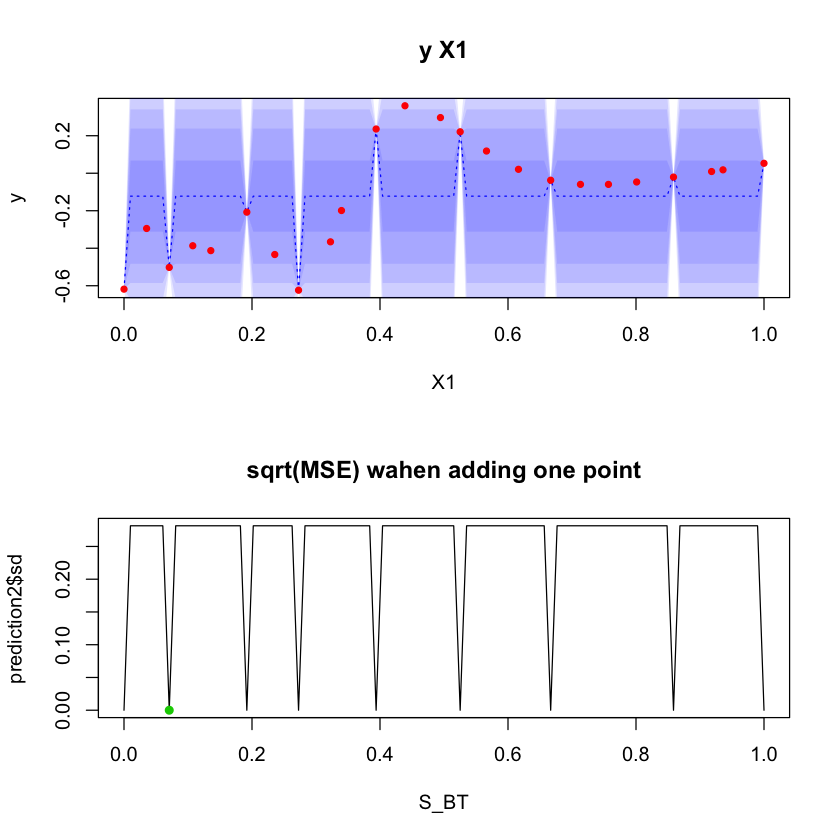

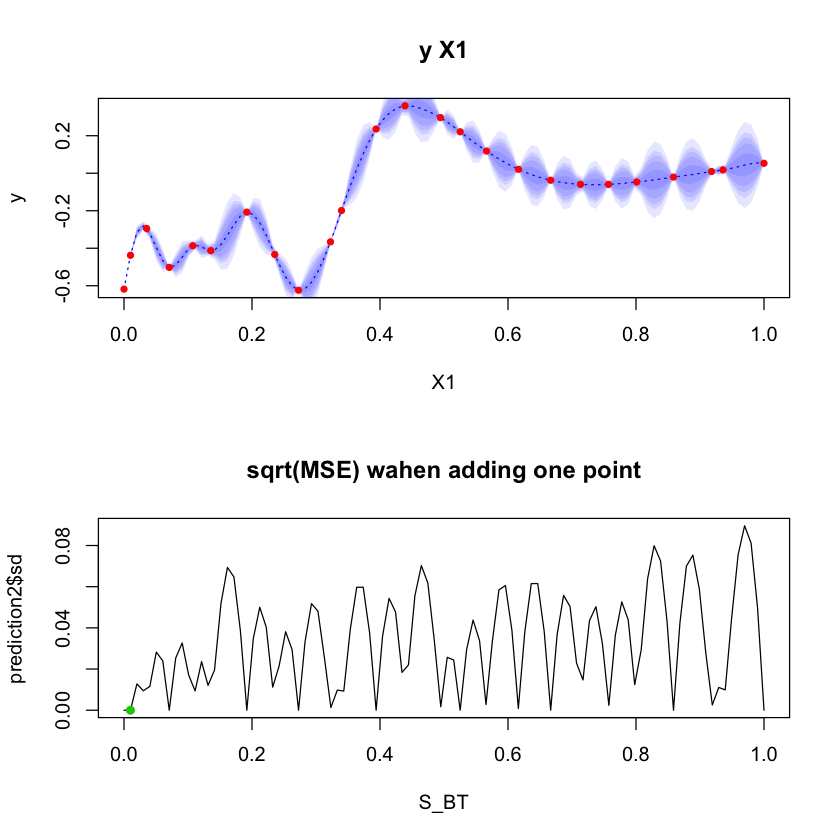

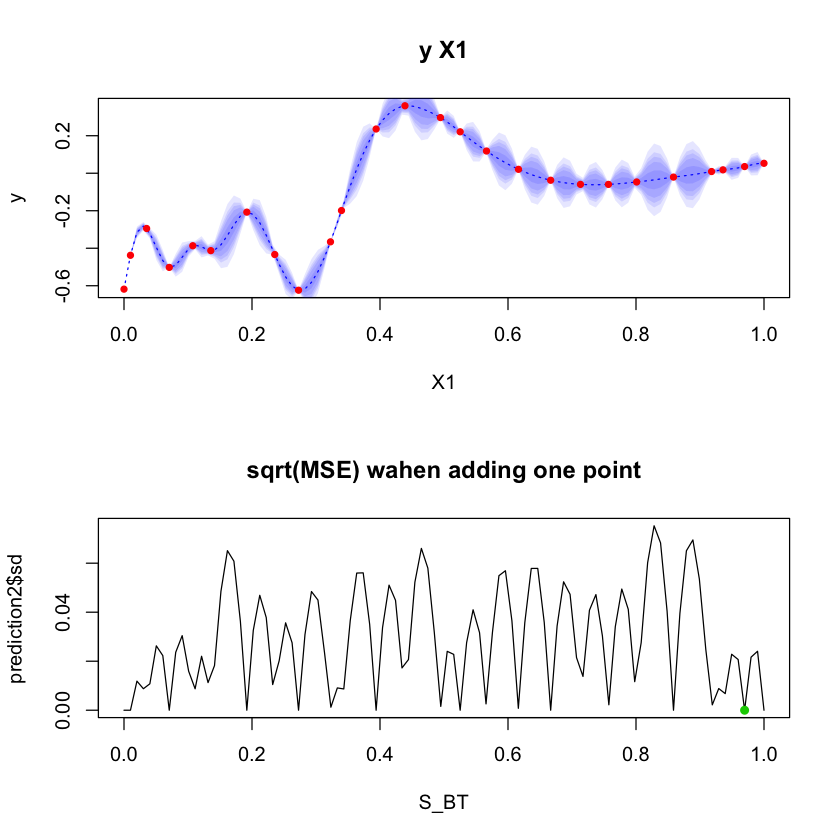

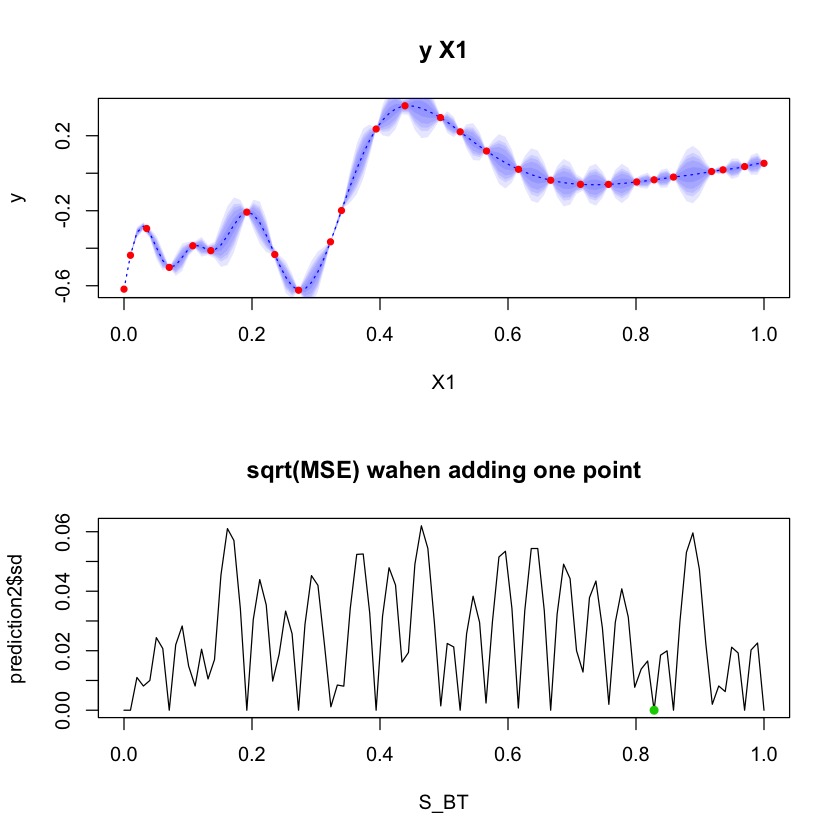

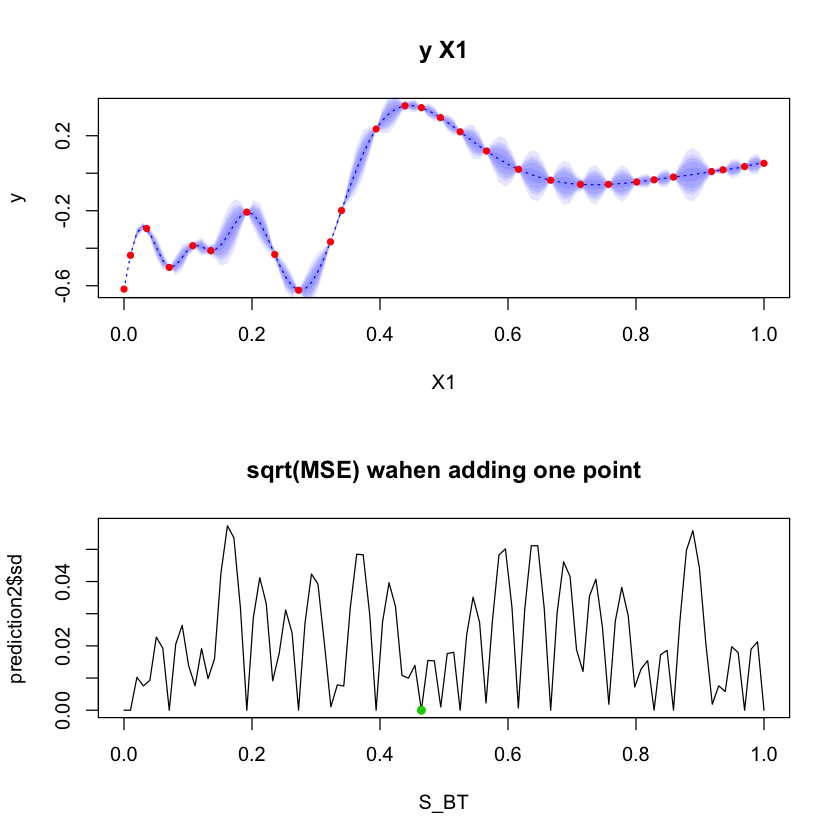

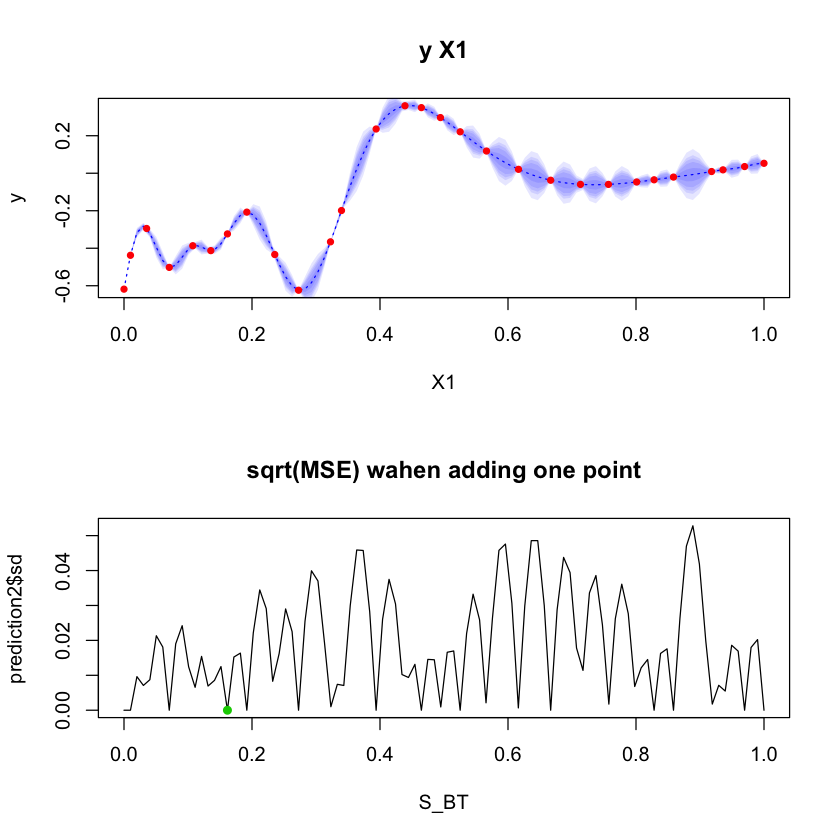

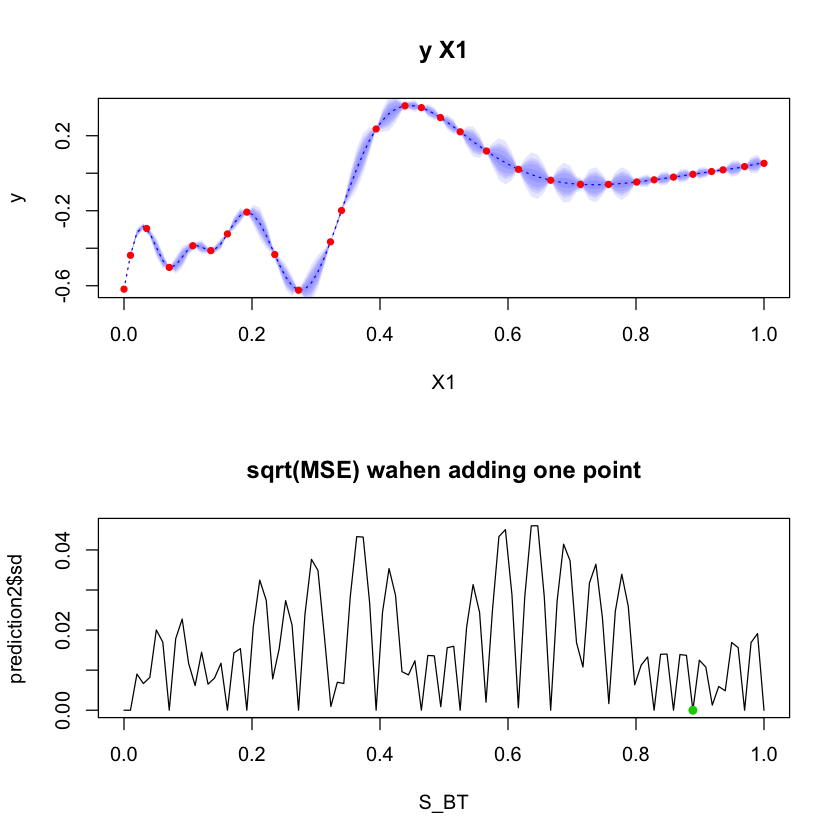

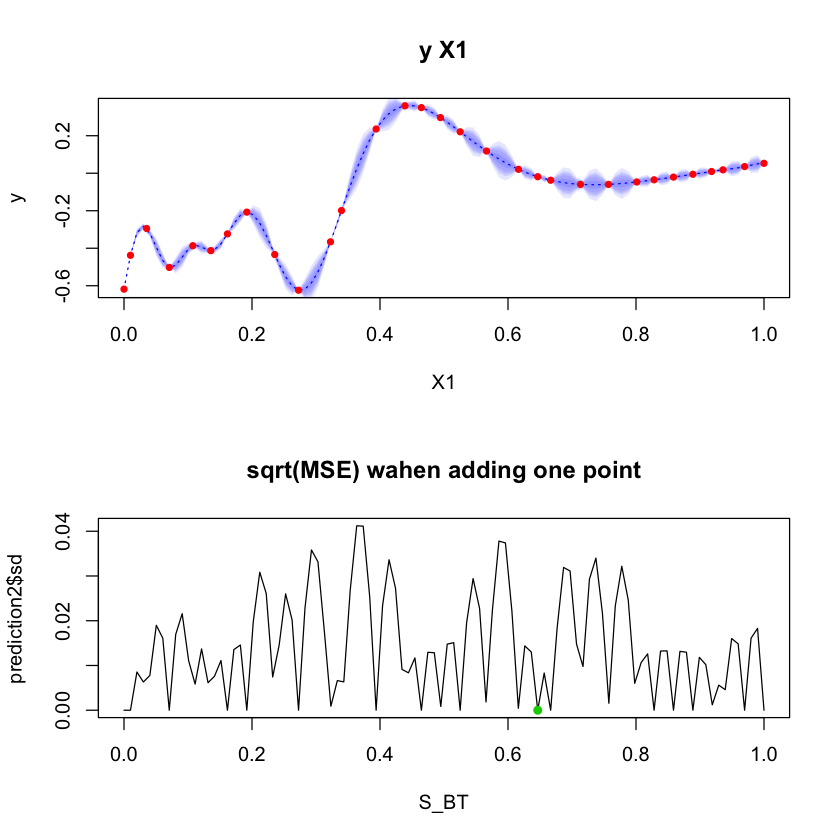

In [18]:
## Step 3 : adaptive construction of the design of experiments
par(mfrow=c(2,1))
sectionview(metamodel,xlim=c(0,1))
plot(S_BT,prediction$sd,type='l',main="sqrt(MSE) of the estimation")

## Adaptive design : one iteration
maxi <- which.max(prediction$sd)  # Research of the point where MSE is maximal
points(S_BT[maxi],prediction$sd[maxi],pch=16,col=3)
S_BA2 <- rbind(S_BA,S_BT[maxi])   # add the new point to the learning basis BA
Y_BA2 <- c(Y_BA,fx_exo2(S_BT[maxi])) # add the corresponding output Y 
metamodel2 <- km(formula=~1,design=S_BA2,response=Y_BA2,covtype="matern5_2") # Update the GP metamodel
prediction2 <- predict.km(metamodel2,S_BT,'UK',checkNames=FALSE) # Update the predictions and the MSE of the metamodel

# Display of the results
par(mfrow=c(2,1))
sectionview(metamodel2)
plot(S_BT,prediction2$sd,type='l',main="sqrt(MSE) of the estimation when adding one point")
points(S_BT[maxi],prediction2$sd[maxi],pch=16,col=3)

## Adaptive design : Automation of the process
nIte <- 15
for (i in 1:nIte){ 
	maxi <- which.max(prediction2$sd)   # Research of the point where MSE is maximal
	S_BA2 <- rbind(S_BA2,S_BT[maxi])    # add the new point to the learning basis BA
	Y_BA2 <- c(Y_BA2,fx_exo2(S_BT[maxi]))
	capture.output(metamodel2 <- km(formula=~1,design=S_BA2,response=Y_BA2,covtype="matern5_2")) # Update the GP metamodel
	prediction2 <- predict.km(metamodel2,S_BT,'UK',checkNames=FALSE) # Update predictions and MSE 
  
  # Affichage
  par(mfrow=c(2,1))
  sectionview(metamodel2)
  plot(S_BT,prediction2$sd,type='l',main="sqrt(MSE) wahen adding one point")
  points(S_BT[maxi],prediction2$sd[maxi],pch=16,col=3)
  Sys.sleep(2)
}
Q2_BTnew <- Q2(Y_BT,prediction2$mean)

**Exercise 3: Construction of GP metamodel with a learning sample in dimension 2**

We consider the schwefel2D analytical function on $[-200,200]^2$:

$$f(x_1,x_2)=-x_1\sin(\sqrt{[x_1|})-x_2\sin(\sqrt{|x_2|}).$$

Apply thr following methodology:

**Step 0: Representation of the function on $[-200,200]^2$**

- evaluate $f$ on an equidistributed grid with $70\times 70$ points and plot $f$.

**Step 1: Construction of a design of experiments (learning sample) and evaluation of $f$ on this design**

- vary the size of the learning sample from $N=70$ to $100$ points;

- vary the type of designs: uniform random design, LHS.

In [2]:
library(lhs)

######################## learning basis and test basis ##########################
N_BA = 80;                ## Number of points in the learning basis
d = 2;     

      
                   ## Inputs space dimension 
S_BA = optimumLHS(N_BA,d);     ## Construction of the learning basis


In [4]:
                           ## Y_BA : outputs of the emulator
N_BT_dim = 70;
N_BT = N_BT_dim^2;               ### Number of points in the test basis
S_BT_dim <- seq(0,1,length.out=N_BT_dim)
S_BT <- expand.grid(S_BT_dim,S_BT_dim) ### Construction of an initial test basis
                           ## S_BT : inputs in the test basis
                           ## Y_BT : corresponding emulator's outputs


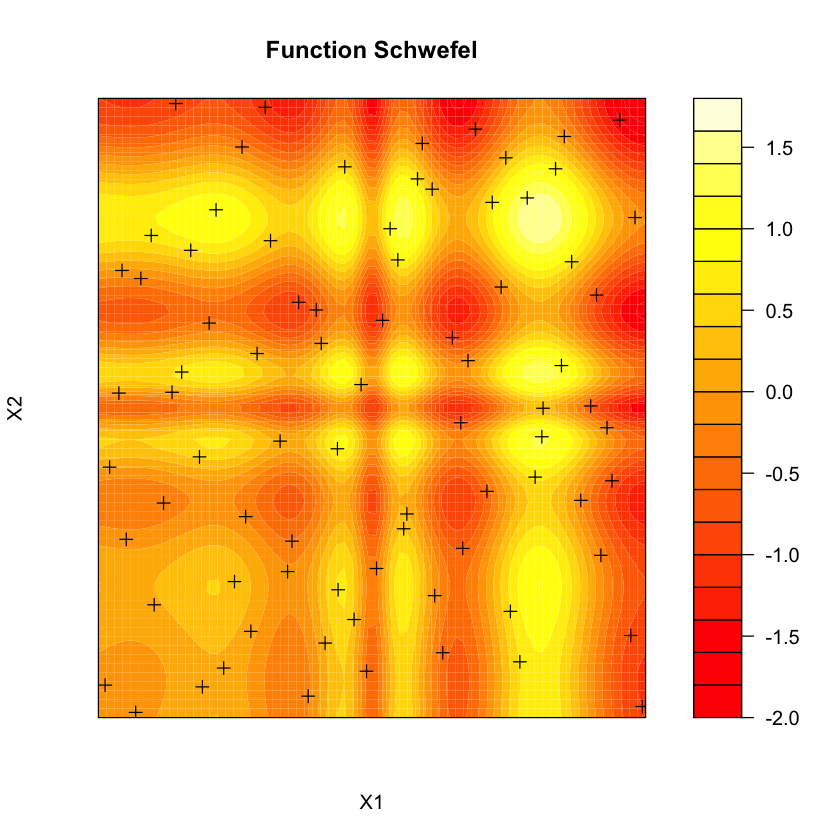

In [5]:
 schwefel <- function(x){
x2 <- x*400-200
rowSums(-x*sin(sqrt(abs(x2))))
}

Y_BA <- schwefel(S_BA)
Y_BT <- schwefel(S_BT)

par(mfrow=c(1,1))
filled.contour(S_BT_dim,S_BT_dim,matrix(Y_BT,N_BT_dim,N_BT_dim),main='Function Schwefel',xlab='X1',ylab='X2',color.palette=heat.colors,
plot.axes={points(S_BA[,1],S_BA[,2],pch=3)})

**Step 2: Estimation of the parameters of the GP metamodel**

Let $\left(Z(x)_{x \in \mathbb{R}^2}\right)$ be a centered stationary Gaussian process with covariance Matern $3/2$.

Construct the metamodel based on $Z$ conditionally to the points of the learning sample.

- compute and plot the predictor on the test sample;

- plot the error (absolute value) on the test sample;

- compute $Q^2$ on the test sample.


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 
  - parameters upper bounds :  1.963476 1.966666 
  - best initial criterion value(s) :  -49.30097 

N = 2, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       49.301  |proj g|=      0.17249
At iterate     1  f =       47.953  |proj g|=             0

iterations 1
function evaluations 2
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 2
norm of the final projected gradient 0
final function value 47.953

F = 47.953
final  value 47.953016 
converged


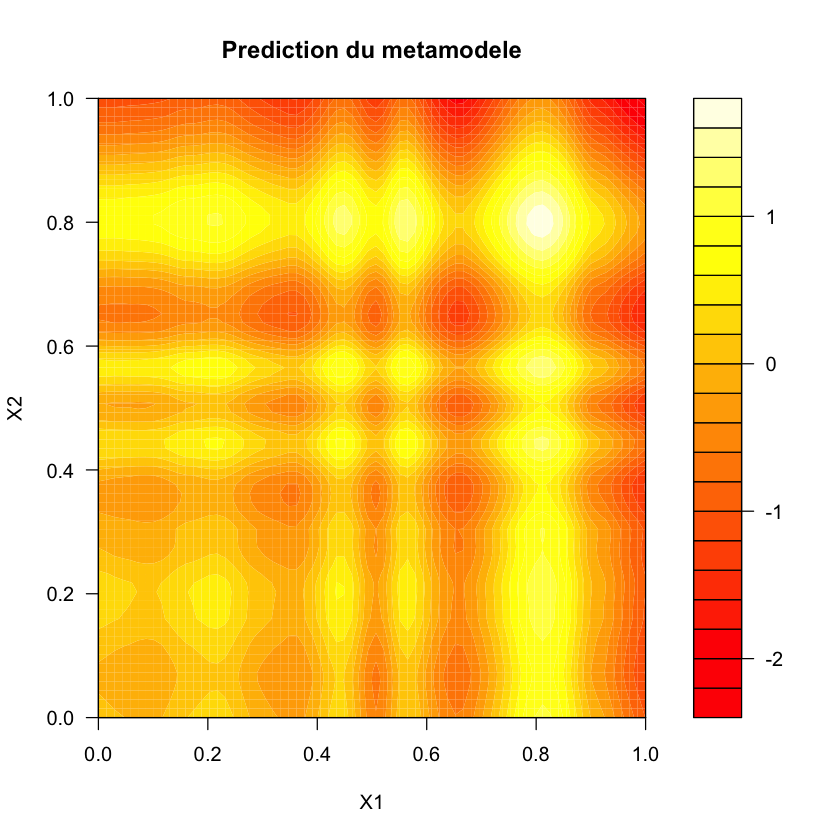

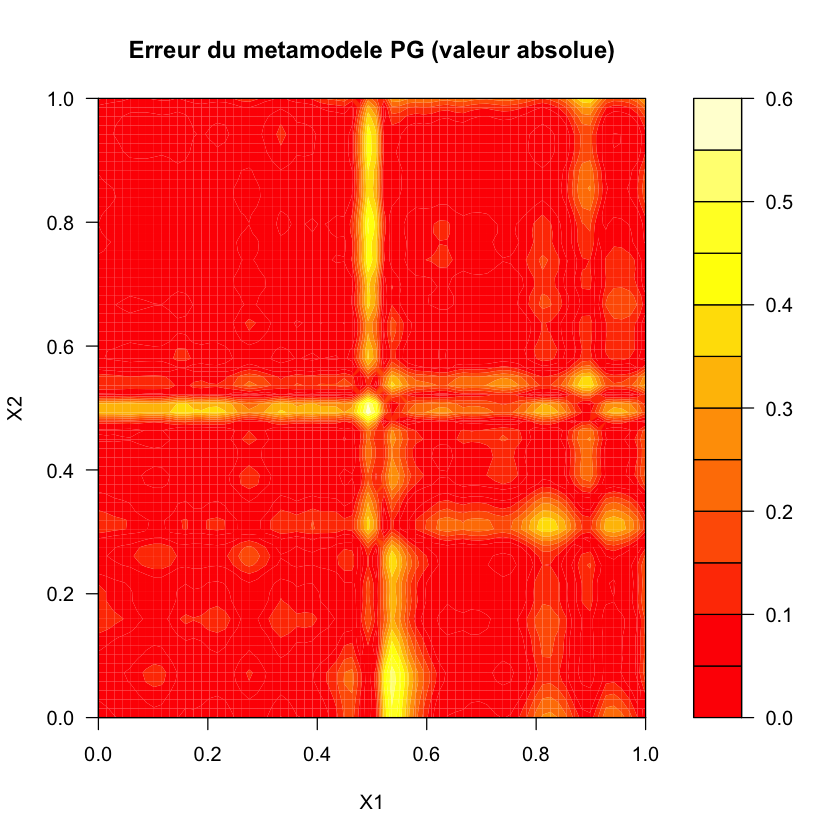

In [6]:
library(DiceKriging)
metamodel <- km(design=S_BA,response= Y_BA, covtype="matern3_2")

# ###### Prediction on BT with GP metamodel  #######
predictions_BT<- predict(metamodel,S_BT,'UK',checkNames=F)

filled.contour(S_BT_dim,S_BT_dim,matrix(predictions_BT$mean,N_BT_dim,N_BT_dim),xlab='X1',ylab='X2',main='Prediction du metamodele',color.palette=heat.colors) 
filled.contour(S_BT_dim,S_BT_dim,matrix(abs(Y_BT - predictions_BT$mean),N_BT_dim,N_BT_dim),xlab='X1',ylab='X2',main='Erreur du metamodele PG (valeur absolue)',color.palette=heat.colors) 


In [7]:
# ###### Computation of Q2 on BT #########
Q2 <- function(y,yhat)
  1-mean((y-yhat)^2)/var(y)
Q2_BT = Q2(Y_BT,predictions_BT$mean) # Computation of Q2 on the test basis 

#### Results' display ####
print(paste('Number of points in the test basis:',N_BA))
print(paste('Inputs space dimension:',d))
print(paste('Q2 on the test basis:',Q2_BT))







[1] "Number of points in the test basis: 80"
[1] "Inputs space dimension: 2"
[1] "Q2 on the test basis: 0.959423154921421"


**Exercise 4: Use of a GP metamodel for sensitivity analysis**

Consider the Ishigami analytical function:

$$f(X_1,X_2,X_3)=\sin(X_1)+7 \sin(X_2)^2 + 0.1 X_3^4 \sin(X_1)$$

with the $X_i$ uniformly distributed on $[-\pi,\pi]$, for $i=1,2,3$.

**Step 0: Compute analytically the first-order Sobol' indices**

- Show that $S_1 = 0.3139$, $S_2 = 0.4424$, $S_3 = 0$.

**Step1: Construction of a DoE and evaluation of $f$ on that design**

- construct a LHS of $N=70$ to $100$ points.

In [18]:

library(lhs)



#### Learning basis and test basis ####

N_BA <- 50;                 ## Number of points in the learning basis
d <- 3;                     ## Inputs space dimension
S_BA <- randomLHS(N_BA,d)   ## Construction of the learning basis
                            ## S_BA : inputs for the learning basis
                            ## Y_BA : corresponding outputs of the emulator
S_BT <- randomLHS(100,3)    ## Construction of the test basis


In [19]:
ishigami <- function(X,coeff){
  ## Analytical Function of Ishigami for scaled inputs => inputs in [0:1]
	## Ishigami function : Y = sinX1+a*(sinX2).^2 + b*X3.^4*sinX1 for Xi ~ U[-pi;+pi]
	## with a = coeff(1); b=coeff(2) 
	## Generally : coeff = [7 0.1];
	X <- 2*pi*X-pi
	sin(X[,1]) + coeff[1]*sin(X[,2])^2 + coeff[2]*X[,3]^4*sin(X[,1])
}

coeff_fx_test = c(7, 0.1) 
Y_BA <- ishigami(S_BA,coeff_fx_test)
Y_BT <- ishigami(S_BT,coeff_fx_test)

**Step2: Construction of the GP metamodel and control of its quality in terms of prediction**

Let $\left(Z(x)\right)_{x \in \mathbb{R}^2}$ be a Gaussian process with constant mean and Matern $5/2$ stationary covariance. Construct the GP metamodel based on $Z$ conditionally to the points in the learning sample.

- compute $Q^2$ on a test sample;

- compute $Q^2$ by cross validation on the learning sample.


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.922276 1.986231 1.964401 
  - best initial criterion value(s) :  -114.8982 

N = 3, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        114.9  |proj g|=       1.9201
At iterate     1  f =       114.62  |proj g|=       0.77364
At iterate     2  f =        111.9  |proj g|=        1.9015
At iterate     3  f =       111.28  |proj g|=        1.8968
At iterate     4  f =       111.17  |proj g|=        1.8921
At iterate     5  f =       111.06  |proj g|=         1.884
At iterate     6  f =       111.04  |proj g|=        1.8804
At iterate     7  f =          111  |proj g|=        1.8719
At iterate     8  f =       110.94  |proj g|=        1.8524
At it

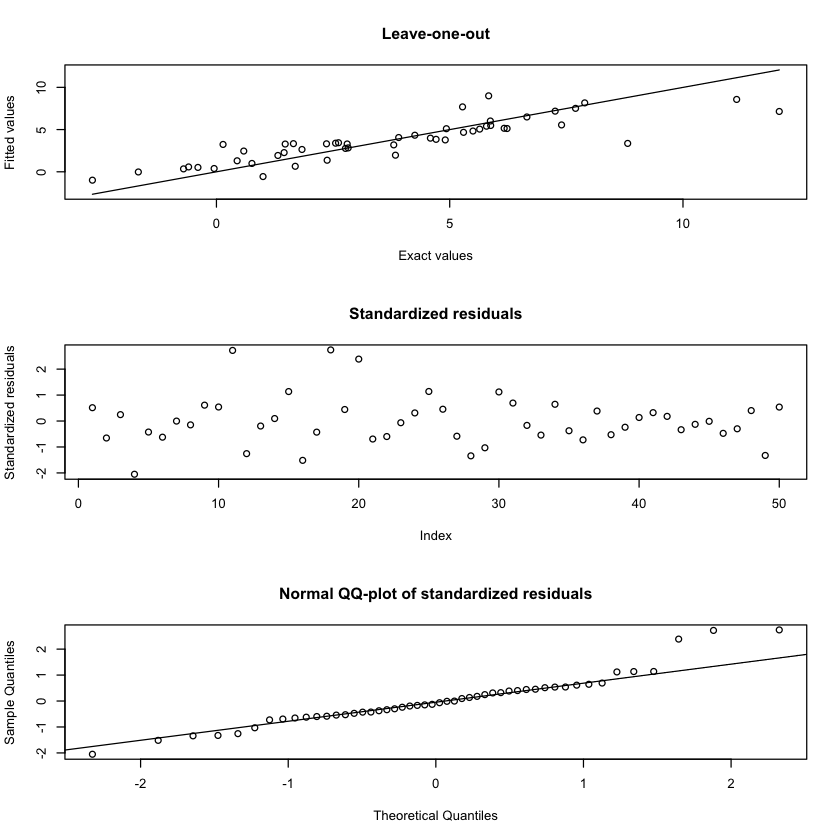

In [21]:
#### METAMODELING ####
library(DiceKriging)
metamodel <- km(formula=~1,design=S_BA,response=Y_BA,covtype="matern5_2")
plot(metamodel) # Affichage des resultats

## Computation of Q2 on the test basis
Q2 <- function(y,yhat)
  1-mean((y-yhat)^2)/var(y)

prediction <- predict(metamodel, S_BT, 'UK', checkNames=FALSE)$mean
Q2_BT<-Q2(Y_BT,prediction)
print(paste('Q2 sur Base de test :',Q2_BT))

## Computation of Q2 by cross validation
prediction_LOO <- leaveOneOut.km(metamodel,'UK')$mean
Q2_LOO<- Q2(Y_BA,prediction_LOO)
print(paste('Q2 sur Base de test :',Q2_LOO))


**Step 3: Estimate the Sobol' indices**


Call:
sobolEff(model = f, X1 = sample1, X2 = sample2, order = 1)

Model runs: 40000 

Model variance: 8.352642 



Sobol indices
   original std. error min. c.i. max. c.i.
X1 0.334301   0.008231  0.318169  0.350433
X2 0.478900   0.007400  0.464396  0.493404
X3 0.029686   0.010200  0.009695  0.049677


Call:
sobolEff(model = f, X1 = sample1, X2 = sample2, order = 0)

Model runs: 40000 

Model variance: 8.352642 



Sobol indices
   original std. error min. c.i. max. c.i.
X1 0.423195   0.006476  0.410502  0.435888
X2 0.608001   0.008250  0.591832  0.624170
X3 0.126796   0.002714  0.121476  0.132116


Call:
sobolroalhs(model = f, factors = 3, N = 10000, order = 1, nboot = 100)

Model runs: 20000 

Model variance:
[1] 8.598695

First-order indices:
     original          bias  std. error  min. c.i.  max. c.i.
X1 0.35840622 -6.055957e-06 0.008140359 0.34120217 0.37369866
X2 0.47561057 -2.096764e-04 0.009244107 0.45467690 0.49058096
X3 0.04833522 -6.503800e-04 0.009815413 0.02871866 0.06626788


Warning message in sobolroalhs(model = f, factors = 3, N = 10000, order = 2, nboot = 100):
“The value entered for N is not the square of a prime number. It has been replaced by: 9409”


Call:
sobolroalhs(model = f, factors = 3, N = 10000, order = 2, nboot = 100)

Model runs: 18818 

Model variance:
[1] 8.41163

Closed second-order indices:
     original         bias  std. error min. c.i. max. c.i.
X12 0.8766509 0.0007048419 0.005488981 0.8647213 0.8863215
X13 0.4192314 0.0004895570 0.008392315 0.4030418 0.4376586
X23 0.5809183 0.0010753247 0.007553946 0.5664015 0.5960809


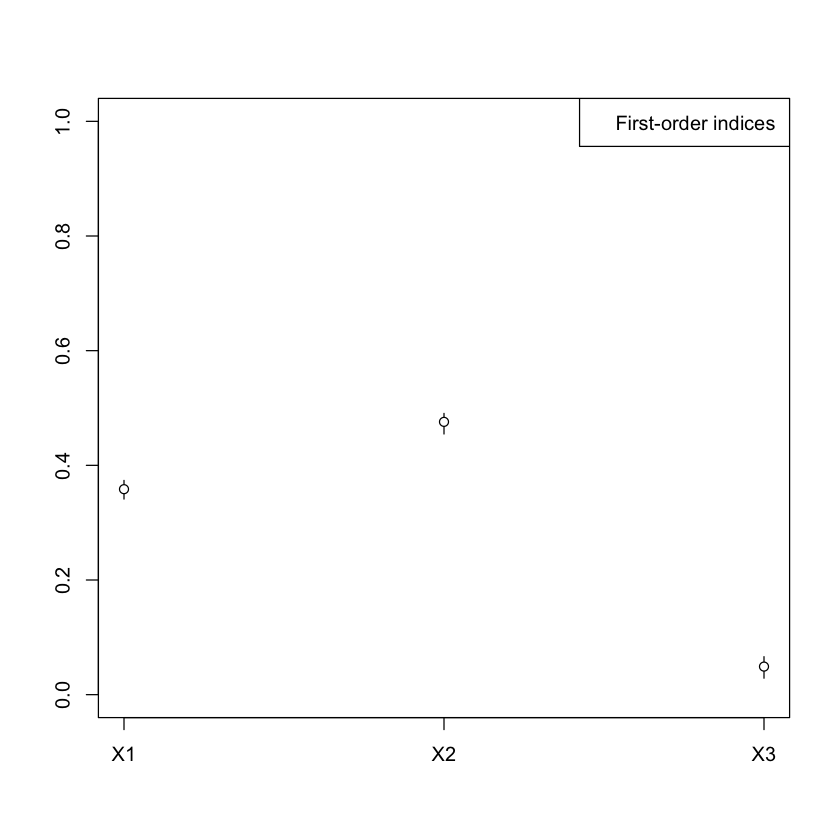

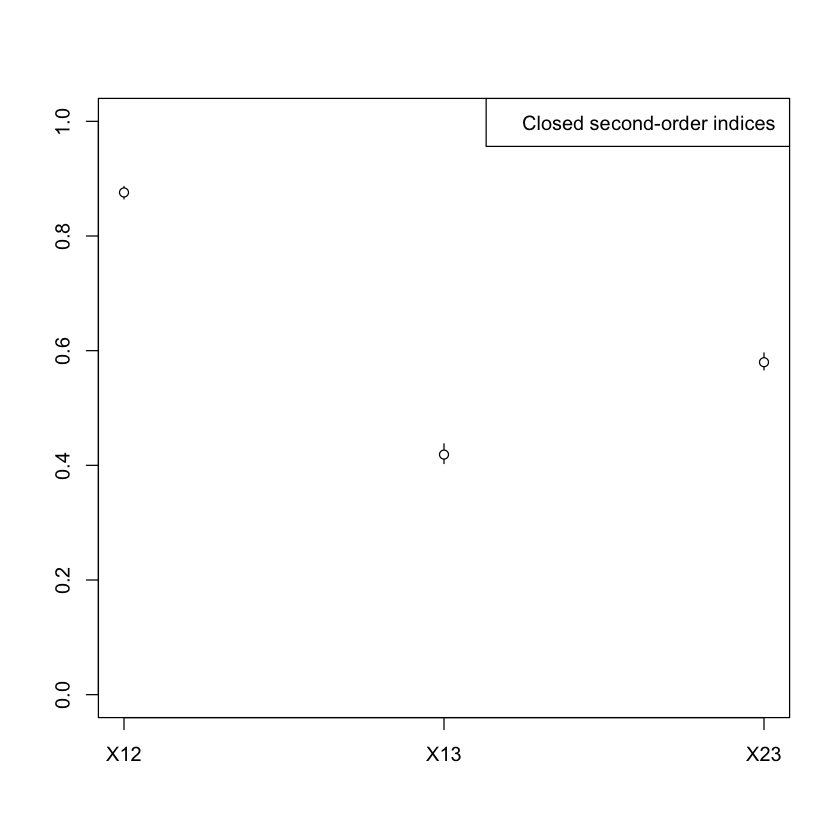

In [23]:
library(sensitivity)
library(boot)
library(numbers)
#### Estimation of first-order and total Sobol' indices ####
# Building of the gaussian process metamodel used to compute Sobol' indices
f <- function(x) 
  predict(metamodel,x,type='UK',checkNames=FALSE)$mean

## Computation of Sobol' indices by SobolEff Janon et al. (2014)
n <- 10000
sample1 <- data.frame(X1=runif(n,0,1),X2=runif(n,0,1),X3=runif(n,0,1))
sample2 <- data.frame(X1=runif(n,0,1),X2=runif(n,0,1),X3=runif(n,0,1))
indices.sobol <- sobolEff(f,sample1,sample2,order=1)
indices.sobol.totaux <- sobolEff(f,sample1,sample2,order=0)
indices.sobol
indices.sobol.totaux
## Computation of first- and closed second-order Sobol' indices with replicated designs
indices.sobol.rep.o1 <- sobolroalhs(model = f, factors = 3, N = 10000, order = 1, nboot=100)
print(indices.sobol.rep.o1)
plot(indices.sobol.rep.o1)
indices.sobol.rep.o2 <- sobolroalhs(model = f, factors = 3, N = 10000, order = 2, nboot=100)
print(indices.sobol.rep.o2)
plot(indices.sobol.rep.o2)
